In [10]:
# Seaborn은 matplotlib 기반으로 시각화 라이브러리
# 많이 사용하는 10개 차트 실습
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [11]:
# 순서:seaborn 기본 테마 설정
# 스타일: darkgrid, whitegrid , dark, white, ticks

sns.set_theme(style='dark')
#샘플 데이터 로드
tips = sns.load_dataset('tips') # tip을 많이 주는 테이블을 찾아보자
tips.head() # head가 된다느거는 'data frame"이다



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips.info()
#Dtype: 데이터 종류, category: 범주형 data
#<주의> 데이터양 많을 수록 category로 타입바꿔야 메모리 사용량 확 작아짐
# object로 하면 6자 , 4자 로 저장해야하는데 astype => 카테고리로 바꾸야하
# 결론: 범주형 데이터는 "category" 바꿔야함

# 메모리는 항상 issue 임,처음부터 작업 다시해야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
tips.describe() # 숫자데이터에 대한 기본 통계량 확인

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tips['time'].unique() # 'time'열에 있는 고유한 값들만 추출



['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

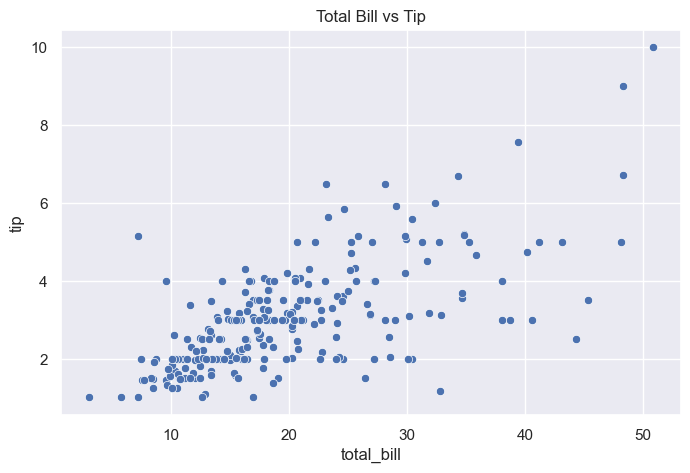

In [18]:
# 1.관계형 플롯(relational plots)
# 두 연속형 변수(컬럼) 간의 관계를 시각화
# 1.1 scatterplot(산점도)
# sns.scatterplot(data,x,y,hue,size,style,palette,alpha)
# 필수: data(dataframe),x(x축에 적용할 컬럼 지정),y(y축에 적용할 컬럼 지정)
# 옵션: hue,size,

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip'    
    
)
ax.set_title('Total Bill vs Tip')
plt.show()

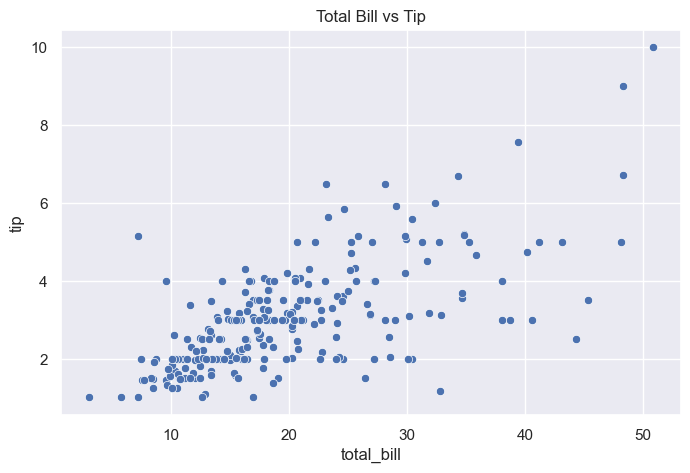

In [19]:
# 성별(sex)에 따라 전체 금액과 팁을 시각화
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip'        
)
ax.set_title('Total Bill vs Tip')
plt.show()





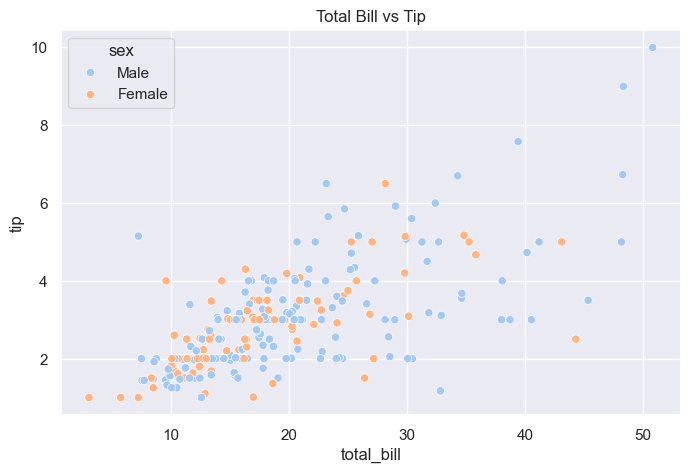

In [ ]:
# 성별(sex)에 따라 전체 금액과 팁을 시각화
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    hue='sex', #범례표시 : Male, Female 색상이 두개다
    palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')

plt.show()


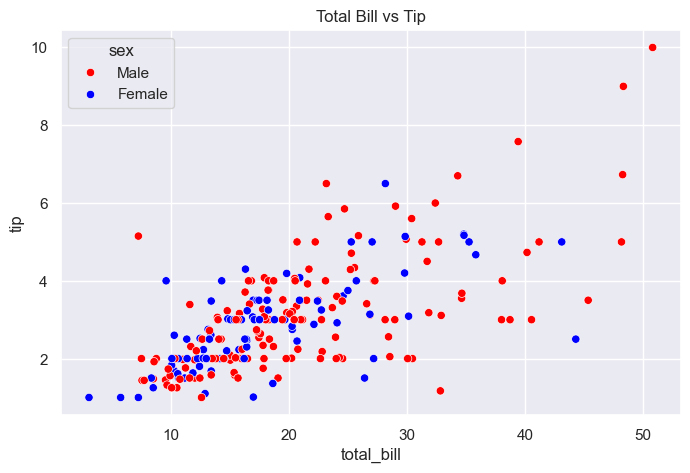

In [ ]:
# 색상 지정 엄청 중요함
# 성별(sex)에 따라 전체 금액과 팁을 시각화
# c_palette = {'Male':'red','female':'blue'}
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot (
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    hue='sex', #범례표시 : Male, Female 색상이 두개다
    # palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
    palette = ['red','blue'] # c_palette
    # 후에 색상 지정
    # 1.만들어진거 쓰던지
    # 2.딕셔너리 만들어서 지정해서 쓰던디(best)
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')
plt.show()


In [62]:
# tips.columns
tips['smoker'].unique()
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

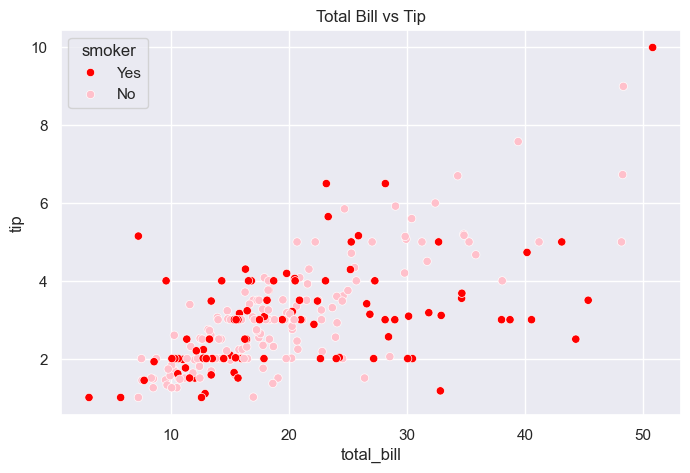

In [63]:
# 요일(day)에 따라 전체 금액과 팁을 시각화
# 색깔 진짜 중요함

# c_palette = {'Thur':'red','Fri':'pink','Sat':'yellow','Sun':'orange'}
c_palette = {'Yes':'red','No':'pink'}
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot (
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    # hue='day', #범례표시 : Male, Female 색상이 두개다
    hue='smoker', #범례표시 : Male, Female 색상이 두개다
    # palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
    palette = c_palette
    # 후에 색상 지정
    # 1.만들어진거 쓰던지
    # 2.딕셔너리 만들어서 지정해서 쓰던디(best)
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')
plt.show()


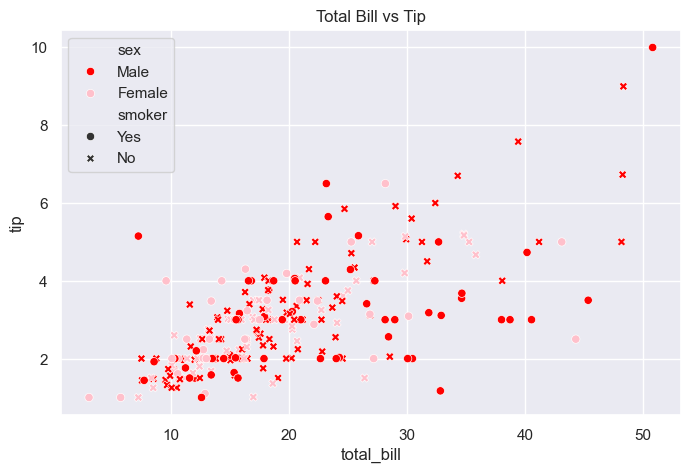

In [67]:
# 요일(day)에 따라 전체 금액과 팁을 시각화
# 색깔 진짜 중요함

# c_palette = {'Thur':'red','Fri':'pink','Sat':'yellow','Sun':'orange'}
c_palette = {'Male':'red','Female':'pink'}
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot (
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    # hue='day', #범례표시 : Male, Female 색상이 두개다
    hue='sex', #범례표시 : Male, Female 색상이 두개다
    # palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
    palette = c_palette,
    style = 'smoker'# style ->마커모양 변경
    # 후에 색상 지정
    # 1.만들어진거 쓰던지
    # 2.딕셔너리 만들어서 지정해서 쓰던디(best)
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')
plt.show()


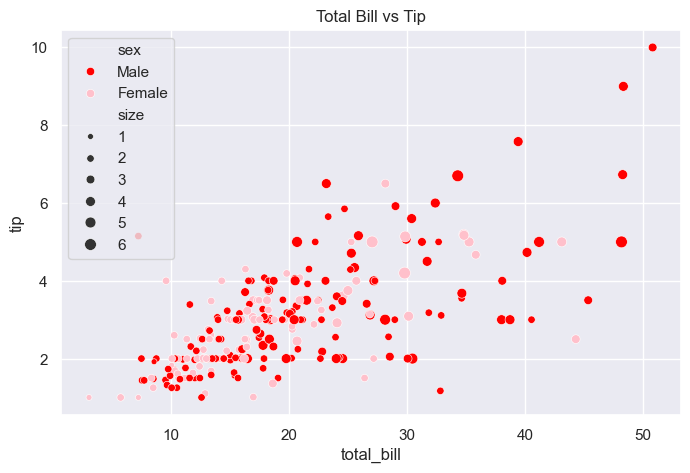

In [73]:
# 요일(day)에 따라 전체 금액과 팁을 시각화
# 색깔 진짜 중요함

# c_palette = {'Thur':'red','Fri':'pink','Sat':'yellow','Sun':'orange'}
c_palette = {'Male':'red','Female':'pink'}
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot (
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    # hue='day', #범례표시 : Male, Female 색상이 두개다
    hue='sex', #범례표시 : Male, Female 색상이 두개다
    # palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
    palette = c_palette,  #조건의 색상
    # style = 'smoker' ,
    size = 'size' # 점크기 / 컬럼명을 사이즈로 줄 수 있음
    # style ->마커모양 변경
    # 후에 색상 지정
    # 1.만들어진거 쓰던지
    # 2.딕셔너리 만들어서 지정해서 쓰던디(best)
    
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')
plt.show()


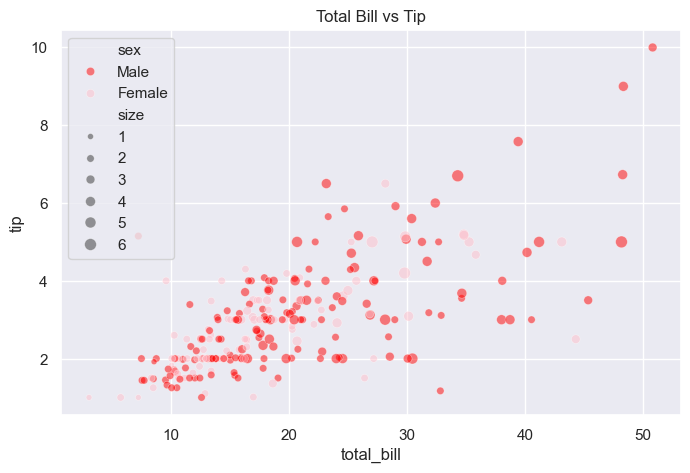

In [84]:
# 요일(day)에 따라 전체 금액과 팁을 시각화
# 색깔 진짜 중요함

# c_palette = {'Thur':'red','Fri':'pink','Sat':'yellow','Sun':'orange'}
c_palette = {'Male':'red','Female':'pink'}
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
ax = sns.scatterplot (
    data = tips,  # tips dataframe
    x='total_bill',
    y='tip',
    # hue='day', #범례표시 : Male, Female 색상이 두개다
    hue='sex', #범례표시 : Male, Female 색상이 두개다
    # palette = 'pastel', # 이방식보다 딕셔너리 방식사용 많이 함
    palette = c_palette,  #조건의 색상
    # style = 'smoker' ,
    size = 'size' # 점크기 / 컬럼명을 사이즈로 줄 수 있음
    # style ->마커모양 변경
    # 후에 색상 지정
    # 1.만들어진거 쓰던지
    # 2.딕셔너리 만들어서 지정해서 쓰던디(best)
    ,alpha = 0.5 #데이터 많을 때 투명도 사용함, 데이터가 어디에 집중이 되있는지
                 # 진하게 있을때 겹치는 부분임 !
#팔레트 사이트 : https://seaborn.pydata.org/tutorial/color_palettes.html
)
ax.set_title('Total Bill vs Tip')
plt.show()


In [119]:
# 1.2 lineplot(선그래프)  : 추세확인, 주로 시계열 데이터, 순서가 있는 데이터
# # flights(비행기 이용객 데이터) 데이터 로드
flights = sns.load_dataset('flights')
flights.head()
flights.tail(12)



,year,month,passengers
132,1960,Jan,417
133,1960,Feb,391
134,1960,Mar,419
135,1960,Apr,461
136,1960,May,472
137,1960,Jun,535
138,1960,Jul,622
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461


In [120]:
# sns.lineplot(data,x,y,hue,style, markers, ci) #라인그래프를 선이 주되기에 markers 할까말까 결정해야함
# ci:(confidence Interval)신뢰구간 and  신뢰구간을 선택할 수 있다!!!
# ci = 신뢰구간선택할 수 있다.

# 신뢰구간 필용한 이유: 평균을 얼마나 신뢰할 수 있냐
# 신뢰구간 작은게 좋음 거임(= 분산이 작다)
# 중간파란선: 평균값 , 그외에 바깥구간 : 신뢰구간
# in 그래프, 평균이 점점 커지고 있다
# 신뢰구간: 저 평균이 얼마만큼 믿을 만 한지

C:\Users\TJ\AppData\Local\Temp\ipykernel_19728\3410056487.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(


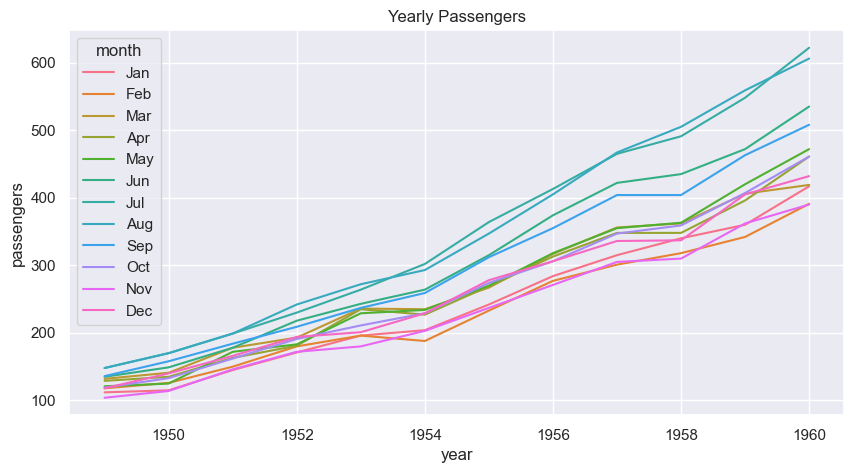

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    data=flights,
    x='year',  # 연도별 평균값  (기억할것: 평균은 대표하는거지 정확한 값 X)
    y= 'passengers',
    # ci=None  # 연도별 한개의 값들만 표현할려면 ci = None필요함
    # ci = 95 # 디폴트가 95 / 95% 구간안에 Data 가 퍼져 있당~~
    # 신뢰구간(ci,흩어짐의 정도): 계산된 평균값이 실제 모집단의 평균값과 얼마나 가까울지에 대한 신뢰도
    ci = 'sd', # 데이터가 평균에서 어떻게 퍼져 있는가?
    # , ci =None, # 표시아예 안하겠다.
    hue = 'month', # 실제적 월별 데이터 / hue줬으니까 팔레트도 줄 수 있다.
    markers = True  # 데이터 포인트(점)를 마커로 표시할지 여부(True/False)

)
ax.set_title('Yearly Passengers')
# 선 위에값: 월마다 평균 승객수의 의미
plt.show()

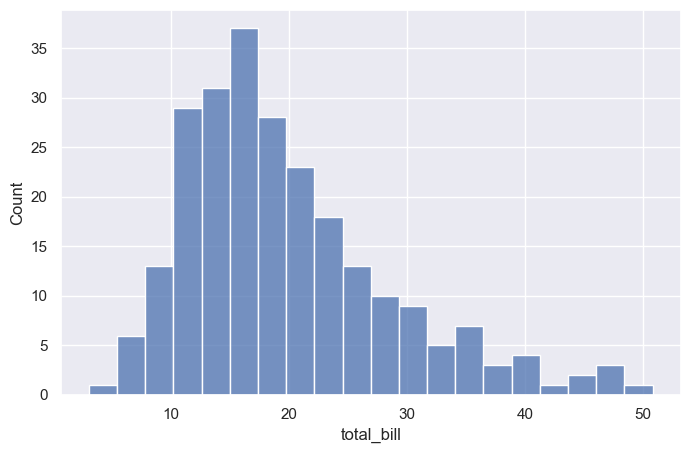

In [133]:
# 2.분포 플롯(Distributional Plot)
# 단일 변수(컬럼)의 분포(히스토그램, 밀도)를 시각화
# 2.1 histplot(히스토그램)

# sns.hisplot(data,x,hue, kde(밀도표시), multiple(stack), bins(구간)) # 단일 데이터라서 X만 들어감
# Total_bill이 요일별로 어떤지?
plt.figure(figsize=(8,5))
ax = sns.histplot(
    data= tips,
    x='total_bill', #연속값 => 구간이 필요하다 , 구간없으면 히스토그램 못그림
    bins = 20

)

# 히스토그램 기본은 밀도다 , 갯수가 아니라~~

In [ ]:
# 결과보고 알 수 있는거
# 1.왜도가 한쪽으로 쏠렸다.
# 2.한쪽으로 쏠린 data는 신경망에 넣으면 안된다.
# 3 . 데이터가 쏠린곳은 예측 잘되고, 데이터 값 작은 쪽은 예측 잘 안됨 -> 성능 떨어짐 결과다

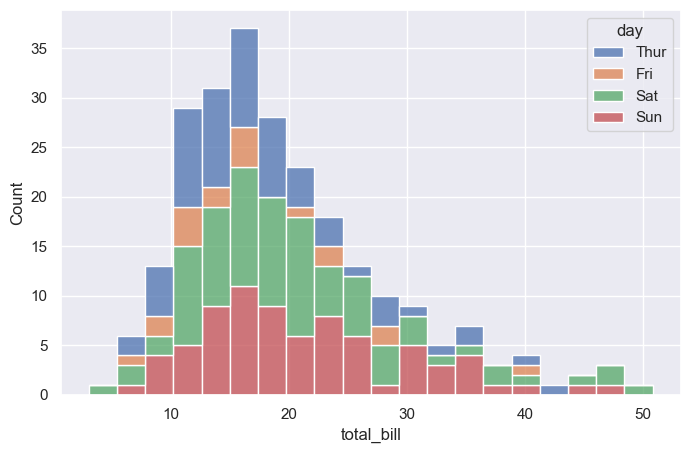

In [ ]:
# 2.분포 플롯(Distributional Plot)
# 단일 변수(컬럼)의 분포(히스토그램, 밀도)를 시각화
# 2.1 histplot(히스토그램)

# sns.hisplot(data,x,hue, kde(밀도표시), multiple(stack), bins(구간)) # 단일 데이터라서 X만 들어감
# Total_bill이 요일별로 어떤지?
plt.figure(figsize=(8,5))
ax = sns.histplot(
    data= tips,
    x='total_bill', #연속값 => 구간이 필요하다 , 구간없으면 히스토그램 못그림
    bins = 20,
    hue ='day'  ,
    multiple='stack' # 있어야 data 선명해짐
)# 히스토그램 기본은 밀도다 , 갯수가 아니라~~

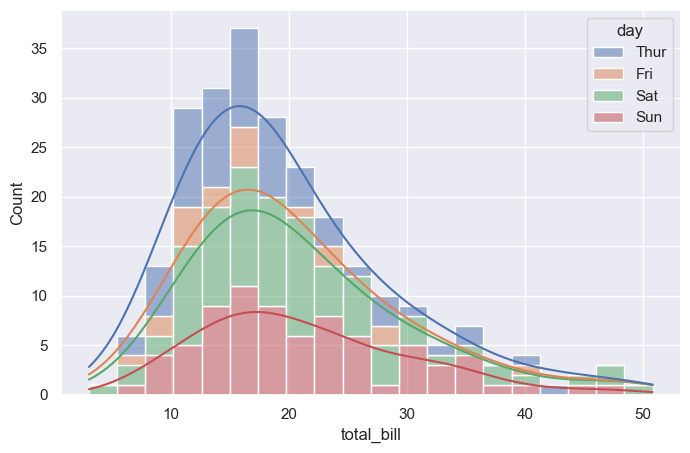

In [139]:
# 2.분포 플롯(Distributional Plot)
# 단일 변수(컬럼)의 분포(히스토그램, 밀도)를 시각화
# 2.1 histplot(히스토그램)

# sns.hisplot(data,x,hue, kde(밀도표시), multiple(stack), bins(구간)) # 단일 데이터라서 X만 들어감
# Total_bill이 요일별로 어떤지?
plt.figure(figsize=(8,5))
ax = sns.histplot(
    data= tips,
    x='total_bill', #연속값 => 구간이 필요하다 , 구간없으면 히스토그램 못그림
    bins = 20,
    hue ='day'  ,
    multiple='stack', # 있어야 data 선명해짐
    kde=True
    
)# 히스토그램 기본은 밀도다 , 갯수가 아니라~~

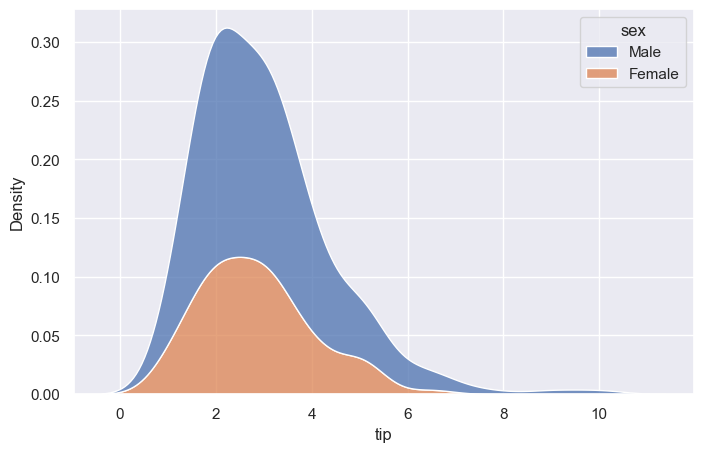

In [163]:
# 2.2 kdeplot(커널 밀도 추정 플롯) : 데이터 밀도 분포 표시
# sns.kdeplot(data,x,y,hue,fill,bw_adjust, multiple='stack')

plt.figure(figsize=(8,5))
ax = sns.kdeplot(
    data= tips,
    x='tip', #연속값 => 구간이 필요하다 , 구간없으면 히스토그램 못그림
    hue = 'sex',
    fill = True,
    # bw_adjust= 2, # 부드러움 표시됨
    multiple= 'stack' 
    
)# 히스토그램 기본은 밀도다 , 갯수가 아니라~~

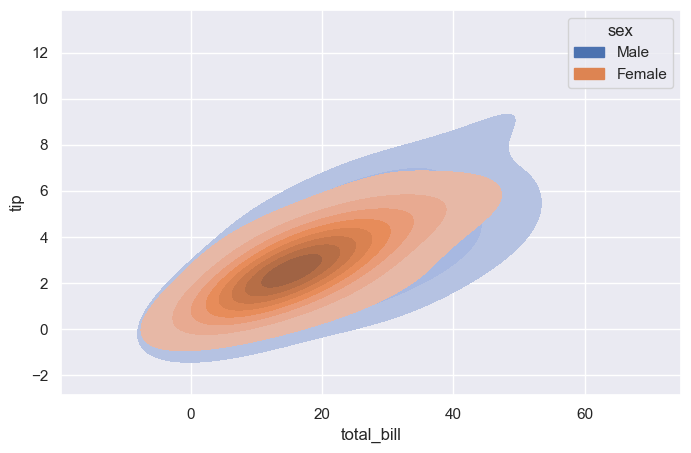

In [167]:
# 2.2 kdeplot(커널 밀도 추정 플롯) : 데이터 밀도 분포 표시
# sns.kdeplot(data,x,y,hue,fill,bw_adjust, multiple='stack')

plt.figure(figsize=(8,5))
ax = sns.kdeplot(
    data= tips,
    x='total_bill', #연속값 => 구간이 필요하다 , 구간없으면 히스토그램 못그림
    y='tip',
    fill = True, # 색깔 채워짐
    hue = 'sex',
    bw_adjust= 2            # 부드럼 표심
    # 데이터가 어디에 몰려있는지 확인가능함~~
)# 히스토그램 기본은 밀도다 , 갯수가 아니라~~

plt.show()

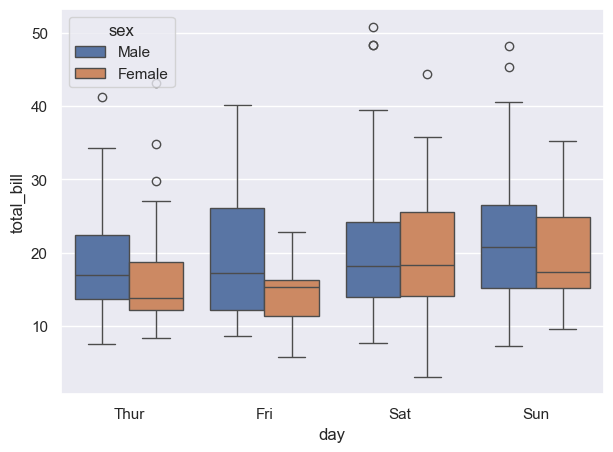

In [ ]:
# 3. 범주형 플롯(categorical plot) : 적어도 하나의 변수(컬럼)가 범주형 일때 사용
# 3.1 boxplot(상자 수염 플롯) : 범주형  변수에 따른 변수의 분포를 사분위수(Quartiles)로 요약하여 표시
# 이상치(Outlier) 탐지에 유용
# 주요 사용법: X(범주형 변수)에 따른 Y(연속값)의 분포 
# 요일별 전체금액의 분포 요약확인

plt.figure(figsize=(7,5))
sns.boxplot(
    data = tips,
    x ='day',
    y='total_bill'
    # 그래프밖에 표시된 동그라미 => 이상값
    ,hue = 'sex' # hue: 그룹별 의미 , 요일별 성별의 전체금액 분포
    

)
plt.show()





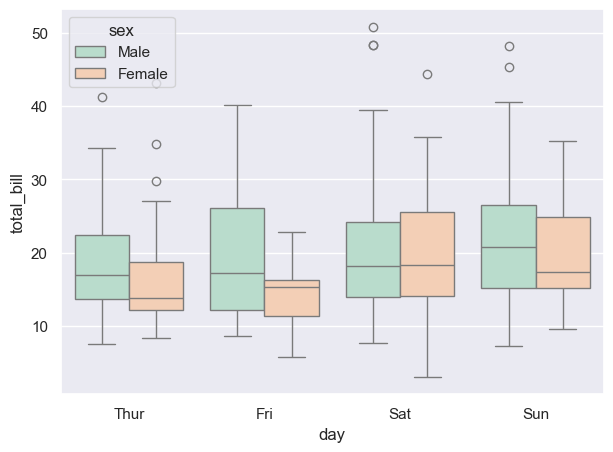

In [183]:
# 3. 범주형 플롯(categorical plot) : 적어도 하나의 변수(컬럼)가 범주형 일때 사용
# 3.1 boxplot(상자 수염 플롯) : 범주형  변수에 따른 변수의 분포를 사분위수(Quartiles)로 요약하여 표시
# 이상치(Outlier) 탐지에 유용
# 주요 사용법: X(범주형 변수)에 따른 Y(연속값)의 분포 
# 요일별 전체금액의 분포 요약확인

plt.figure(figsize=(7,5))
sns.boxplot(
    data = tips,
    x ='day',
    y='total_bill'
    # 그래프밖에 표시된 동그라미 => 이상값
    ,hue = 'sex', # hue: 그룹별 의미 , 요일별 성별의 전체금액 분포
    palette='Pastel2' #색깔 변경

)
plt.show()





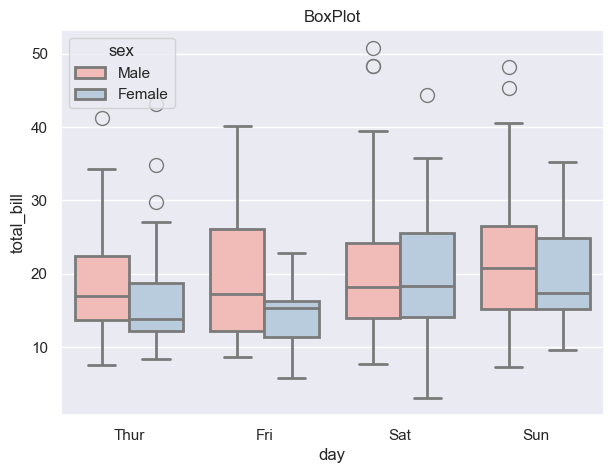

<bound method Axes.set_title of <Axes: title={'center': 'BoxPlot'}, xlabel='day', ylabel='total_bill'>>


In [194]:
# 3. 범주형 플롯(categorical plot) : 적어도 하나의 변수(컬럼)가 범주형 일때 사용
# 3.1 boxplot(상자 수염 플롯) : 범주형  변수에 따른 변수의 분포를 사분위수(Quartiles)로 요약하여 표시
# 이상치(Outlier) 탐지에 유용
# 주요 사용법: X(범주형 변수)에 따른 Y(연속값)의 분포 
# 요일별 전체금액의 분포 요약확인

plt.figure(figsize=(7,5))
ax=sns.boxplot(
    data = tips,
    x ='day',
    y='total_bill'
    # 그래프밖에 표시된 동그라미 => 이상값
   
    ,hue = 'sex', # hue: 그룹별 의미 , 요일별 성별의 전체금액 분포
    palette='Pastel1', #색깔 변경
    # orient='v' # 안주면 verticle
    linewidth= 2,
    fliersize=10
    
)

ax.set_title('BoxPlot') #ax 안에서 직접값을 뽑아낼 수 있다.
# 그림에 관한 모든 object가 다 박스 안에 있어서 여기서 정보 다 뽑아낼 수 있다.
plt.show()
print(ax.set_title) #축 정보





C:\Users\TJ\AppData\Local\Temp\ipykernel_19728\1278589924.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


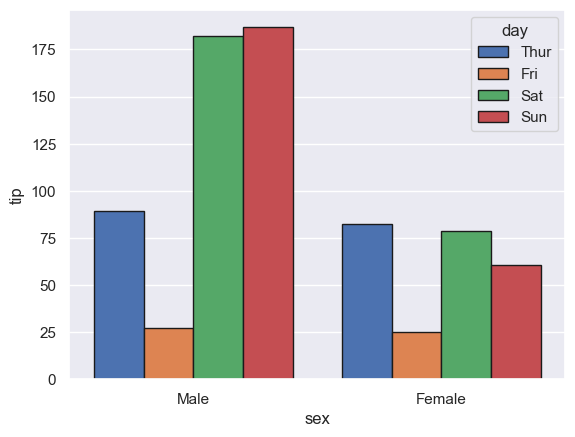

In [213]:
# 3.2 막대그래프(bar plot) : 범주형 변수에 따른 연속형 변수의 대표값(평균)을 막대로 표시
# sns.barplot(data, x, y,hue,palette, ci)
# 성별 평균 팁
ax = sns.barplot(
    data=tips,
    x='sex', # groupby => aggregation : mean
    y='tip',
    estimator=np.sum,#default 는 mean 이다.
    ci = None,
    hue = 'day',
    edgecolor='k', #테두리 검정색
    saturation=1.0 # 채도 , 숫자작을 수록 색이 뭉게짐(잉크아끼고 싶으면 숫자 연하게)
)



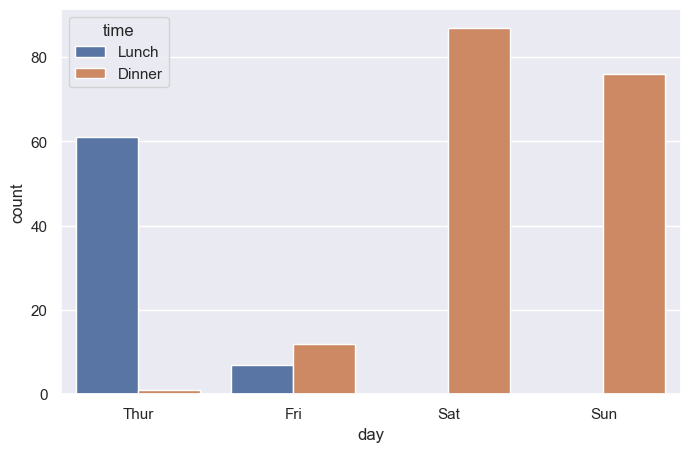

In [219]:
# 3.3 countplot : *범주*형 변수의 계수(빈도)를 막대로 표시, histplot
# 요일별 결제 건수
plt.figure(figsize  = (8,5))
ax = sns.countplot(
    data= tips,
    x='day',
    hue = 'time'
)


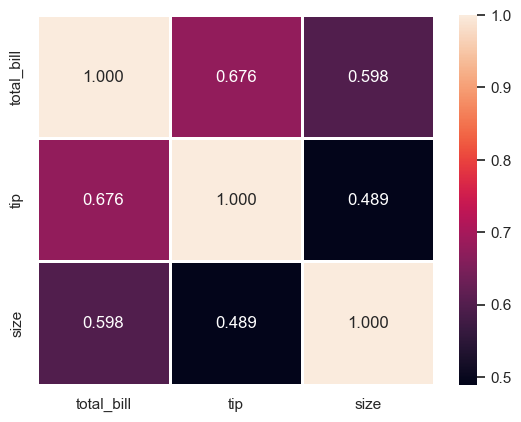

In [ ]:
# 4.매트릭스 및 그리드 플롯(Matrix & Grid plot)
# 4.1 heatmap : 주로 변수간의 상관관계 시각화에 사용
# 주요 사용법: dataframe.corr()의 결과를 입력데이터로 사용

# 상관관계: total_bill, tip, size => 


# tips[['total_bills']] #fancy 색인으 무조건 데이터 프레임

# tips[['total_bill','tip','size']].corr() # 손님이 많다고 무조건 tip만다는건 아니다.

corr_ = tips[['total_bill','tip','size']].corr()

ax = sns.heatmap(
    data=corr_,
    annot=True,
    fmt='.3f',
    # cmap ='coolwarm' # 색상변경
    linewidths=1,
    linecolor='white'
)

In [248]:
corr_

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [254]:
# pairplot(페어플롯) : scatterplot, histplot(kdeplot) : 그리드 형태 표시
# iris(붓꽃) dataset사용
iris = sns.load_dataset('iris')

iris['species'].unique()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


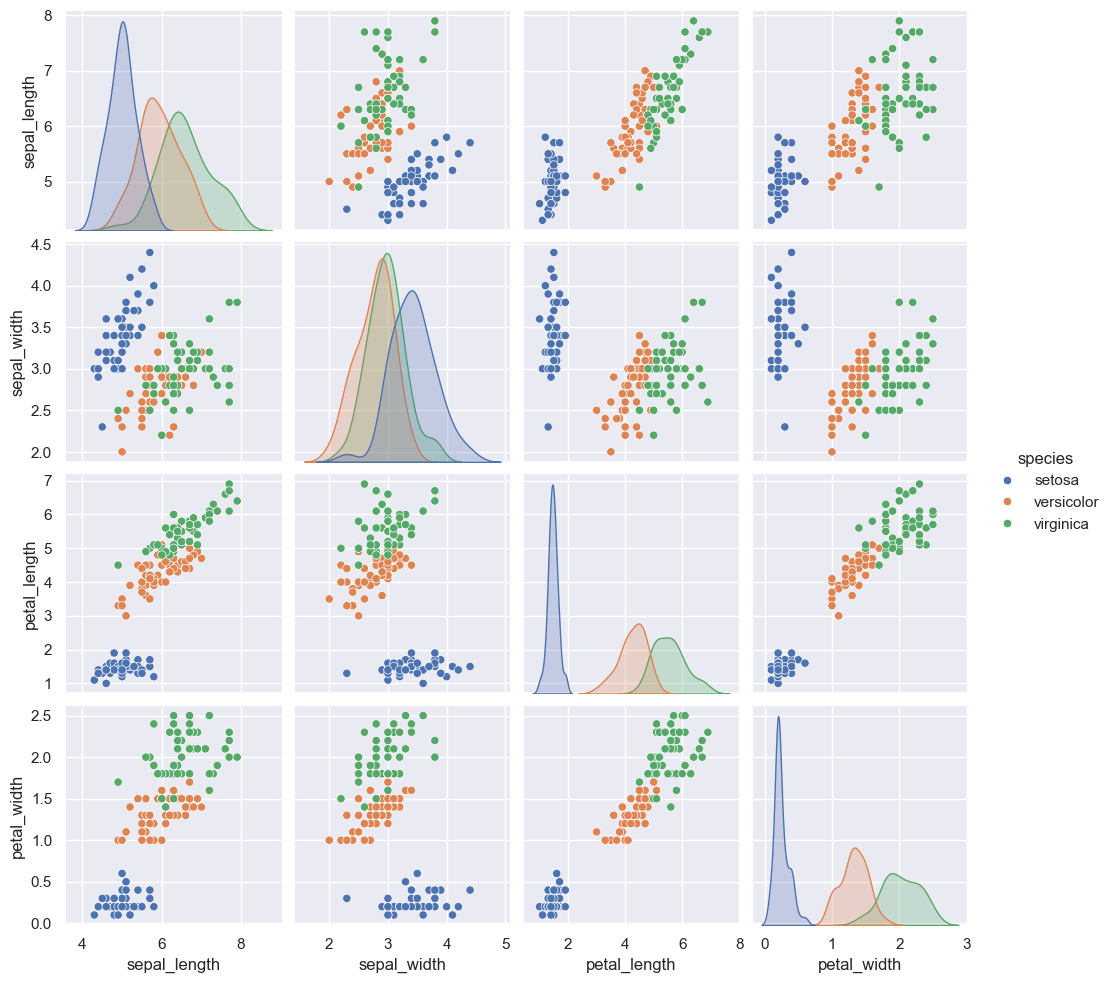

In [ ]:
# 품종별 분포 확인
ax = sns.pairplot(
    data= iris,
    diag_kind='kde', # 확인하기 편함
    hue = 'species' #품종별       
)

#주의점: sepal_length 는 분포가 틀려 비교가 안된다(sepal_length)
# 선형변환 : 평면에서 못 나누면 다른면에서는 나눌수 있다.
# 신경망학습: 꾸거져 있는 걸 찾는거 ,신경망에서 데이터를 꾸겨서 학습시키는거 , 꾸기면 나눌 수 있다.